In [2]:
from sklearn.datasets import *
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG
import dtreeviz
from pydataset import data

In [3]:
clas = tree.DecisionTreeClassifier(max_depth=3)  
iris = load_iris()

X_train = iris.data
y_train = iris.target
clas.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.375, 0.875, 'x[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5, 0.625, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.25, 0.375, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.125, 0.125, 'gini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.375, 0.125, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.75, 0.375, 'x[2] <= 4.85\ngini = 0.043\nsamples = 46\nvalue = [0, 1, 45]'),
 Text(0.625, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 43\nvalue = [0, 0, 43]')]

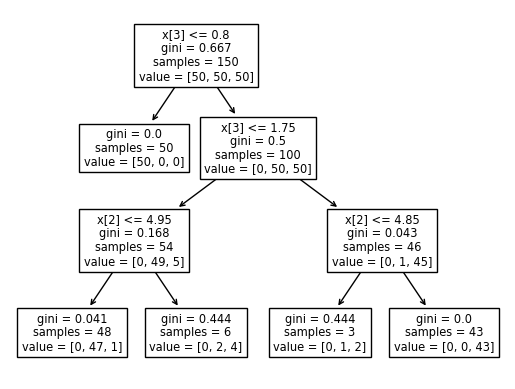

In [4]:
from sklearn.tree import plot_tree
plot_tree(clas)

# 1. Classification

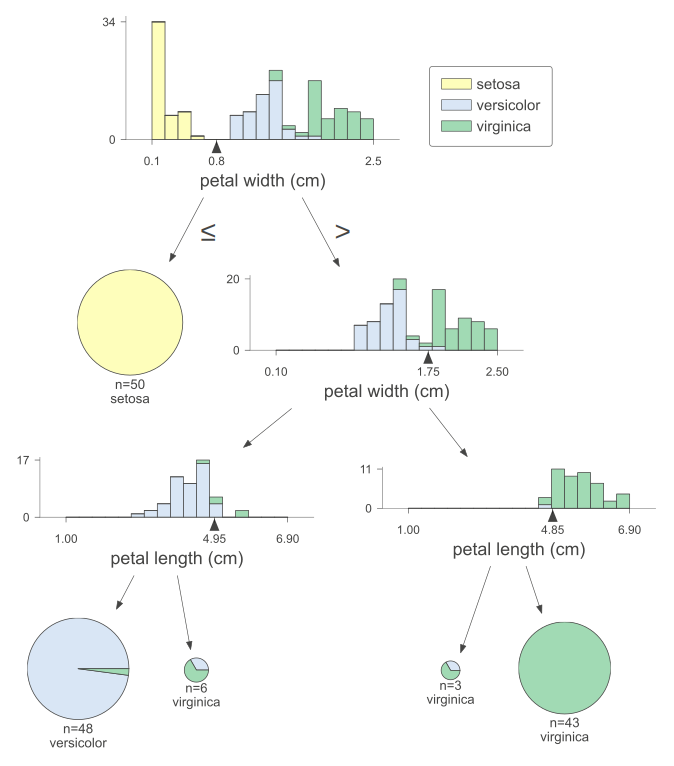

In [5]:

viz = dtreeviz.model(clas, 
               X_train,
               y_train,
               feature_names=iris.feature_names, 
               class_names=["setosa", "versicolor", "virginica"])
viz.view(scale=2)

# 2. Regression

/home/naman/miniforge3/envs/myenv/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
/home/naman/miniforge3/envs/myenv/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide


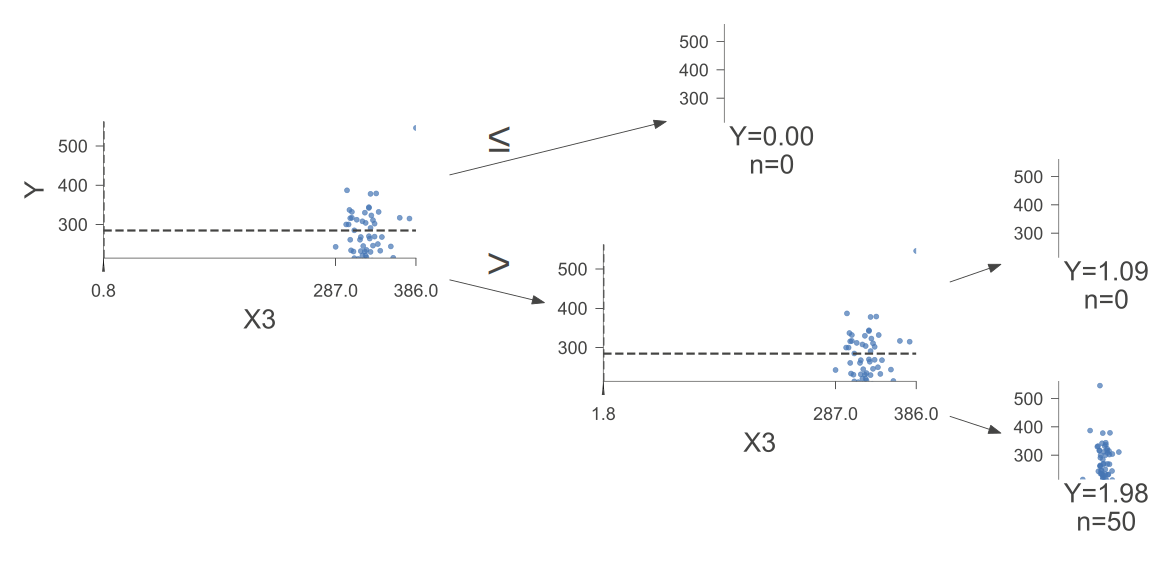

In [6]:
regr = tree.DecisionTreeRegressor(max_depth=2)
education = data('education')

X_train2 = education.iloc[:, 1:5]
y_train2 = education.iloc[:, 5]
regr.fit(X_train, y_train)

viz2 = dtreeviz.model(regr,
               X_train2,
               y_train2,
               target_name='Y',
               feature_names=X_train2.columns,
              )
viz2.view(scale=3, orientation='LR', fancy=True)

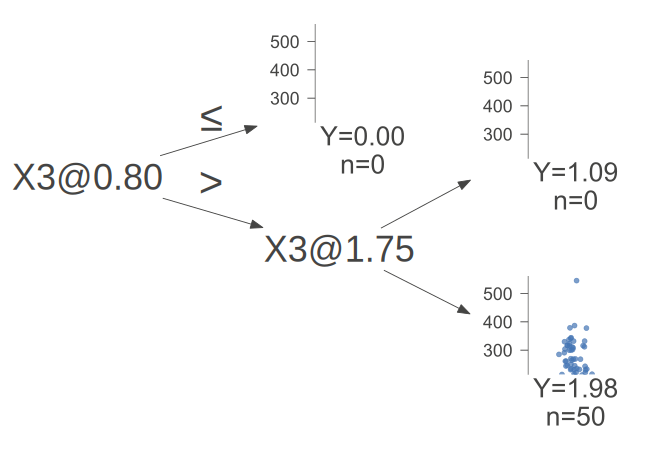

In [7]:
viz2.view(scale=3, orientation='LR', fancy=False)

# 3. Horizontal Decision Tree

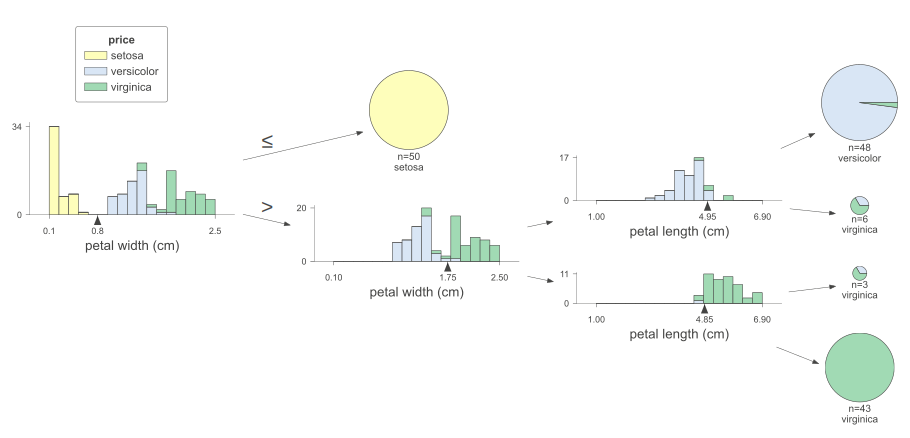

In [8]:
viz = dtreeviz.model(clas, 
               X_train,
               y_train,
               target_name='price',
               feature_names=iris.feature_names, 
               class_names=["setosa", "versicolor", "virginica"], )
viz.view(scale=1.5, orientation='LR', fancy=True)

# 4. Show prediction path

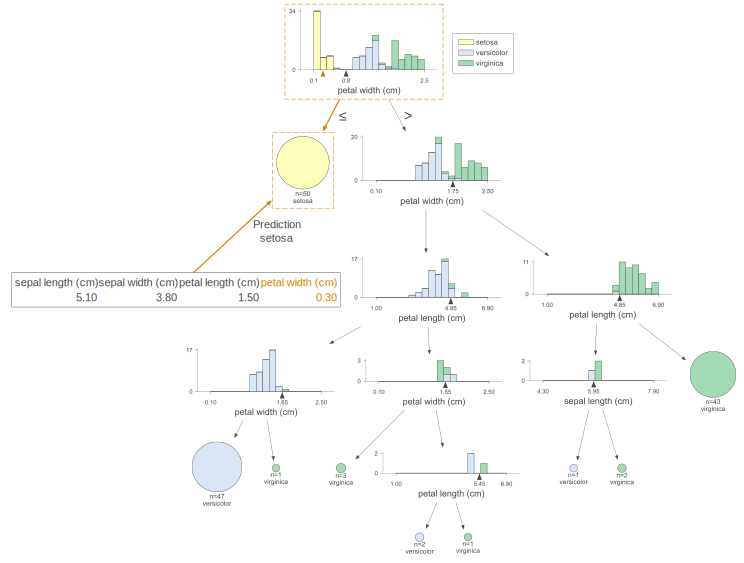

In [9]:
clas = tree.DecisionTreeClassifier()  
iris = load_iris()

X_train = iris.data
y_train = iris.target
clas.fit(X_train, y_train)

X = iris.data[np.random.randint(0, len(iris.data)),:]

viz = dtreeviz.model(clas, 
               X_train,
               y_train,
               feature_names=iris.feature_names, 
               class_names=["setosa", "versicolor", "virginica"], 
               )
viz.view(x=X)

# 5. Show node number

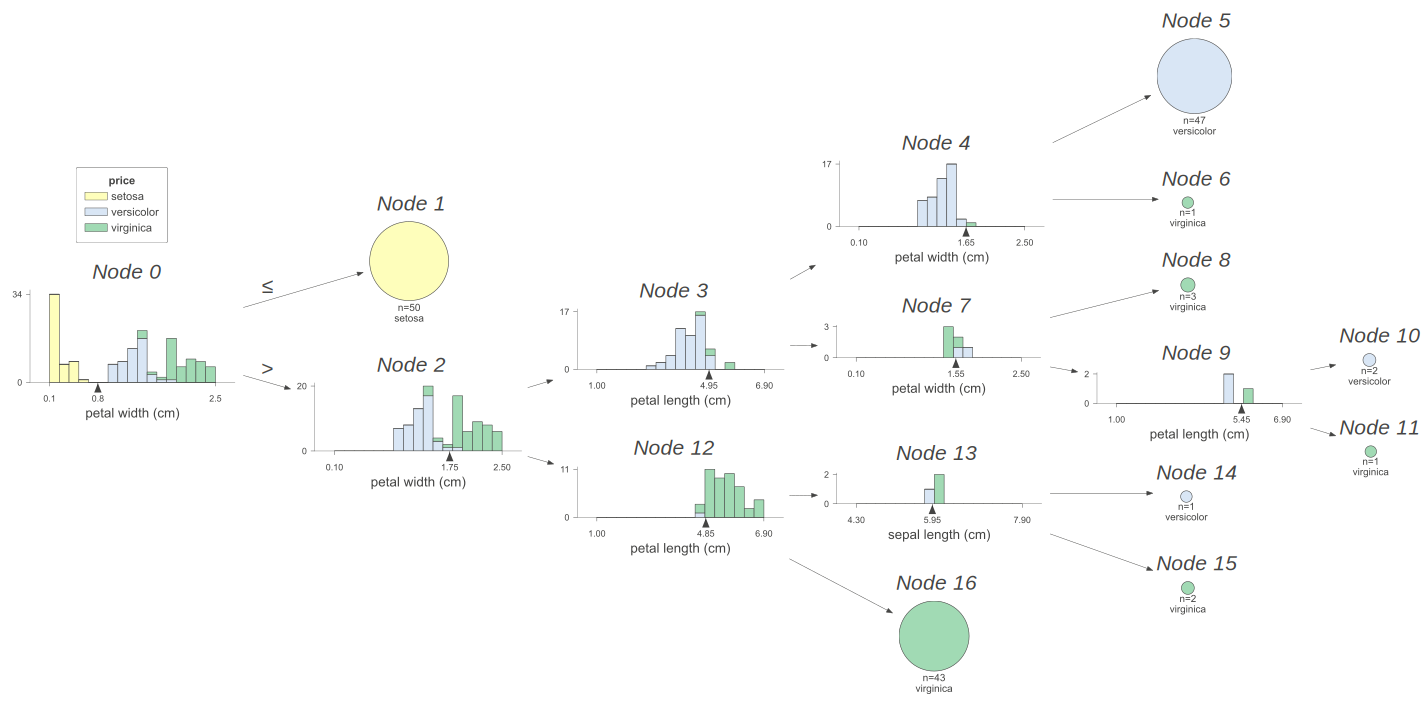

In [10]:

viz = dtreeviz.model(clas, 
               X_train,
               y_train,
               target_name='price',
               feature_names=iris.feature_names, 
               class_names=["setosa", "versicolor", "virginica"], 
               )
viz.view(histtype= 'barstacked',scale = 1.5,orientation='LR',show_node_labels=True)

# 6. Without Any graphs

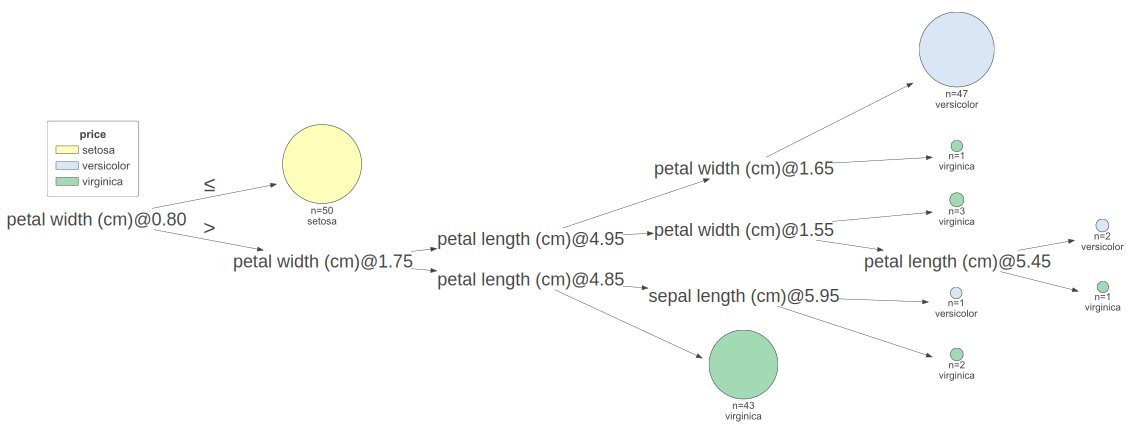

In [11]:
viz = dtreeviz.model(clas, 
               X_train,
               y_train,
               target_name='price',
               feature_names=iris.feature_names, 
               class_names=["setosa", "versicolor", "virginica"], 
)
viz.view(histtype= 'barstacked',scale = 1.5, orientation='LR',fancy=False)

# 7. Show just prediction path, nothing else

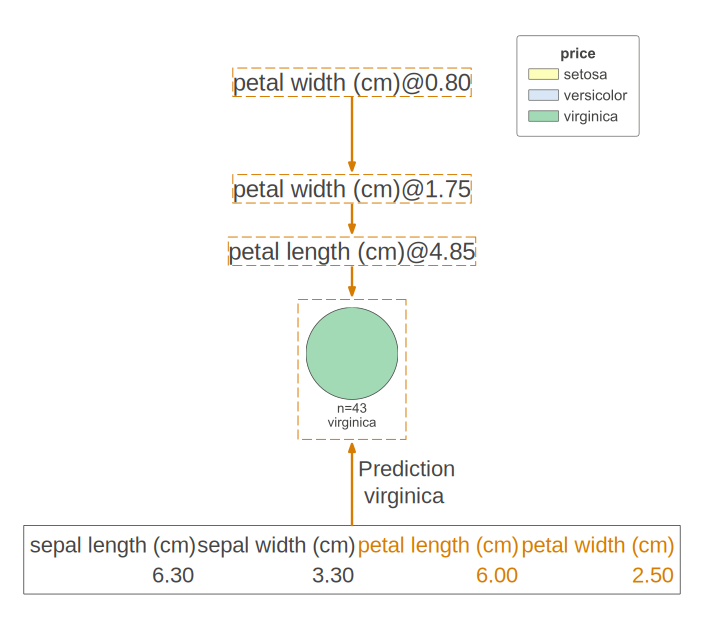

In [28]:
clas = tree.DecisionTreeClassifier()  
iris = load_iris()

X_train = iris.data
y_train = iris.target
clas.fit(X_train, y_train)

X = iris.data[np.random.randint(0, len(iris.data)),:]

viz = dtreeviz.model(clas, 
               X_train,
               y_train,
               target_name='price',
               feature_names=iris.feature_names, 
               class_names=["setosa", "versicolor", "virginica"])
viz.view(scale = 2, x=X, show_just_path=True, fancy=False)

# 8. Prediction Path in Plain english

In [29]:
print(viz.explain_prediction_path(x = X))

4.85 <= petal length (cm) 
1.75 <= petal width (cm) 



# 9. Feature Importance

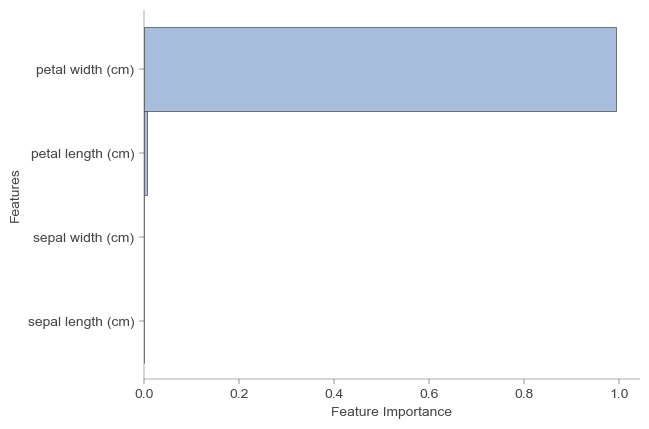

In [36]:
viz.instance_feature_importance(x=X)
     

# 10. Univariate Regression

In [73]:
dataset_url = "https://raw.githubusercontent.com/parrt/dtreeviz/master/data/cars.csv"
df_cars = pd.read_csv(dataset_url)
X = df_cars.drop('MPG', axis=1)
y = df_cars['MPG']
features = list(X.columns)

dtr_cars = DecisionTreeRegressor(max_depth=3, criterion="absolute_error")
dtr_cars.fit(X.values, y.values)

DecisionTreeRegressor(criterion='absolute_error', max_depth=3)

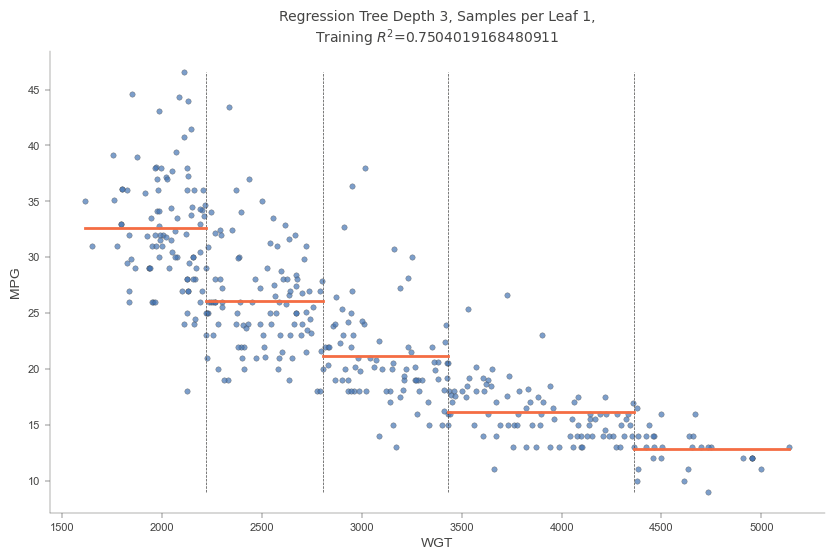

In [75]:
viz_rmodel = dtreeviz.model(dtr_cars, X, y,
                            feature_names=features,
                            target_name='MPG')

viz_rmodel.rtree_feature_space(features=['WGT'], figsize=(10,6))

# 11. 3-D Regression 

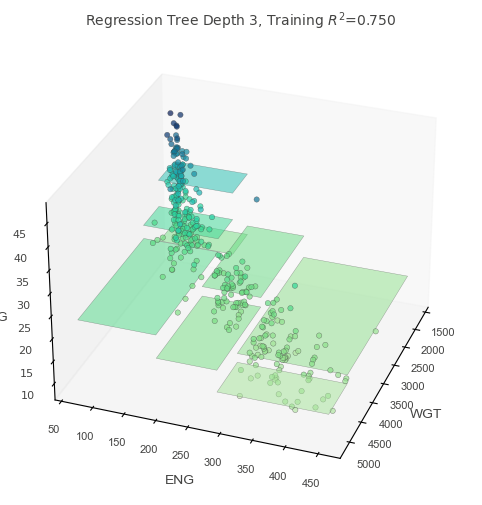

In [77]:
viz_rmodel.rtree_feature_space3D(features=['WGT','ENG'],
                                 fontsize=10,
                                 elev=30, azim=20,
                                 show={'splits', 'title'},
                                 colors={'tessellation_alpha': .5}, figsize=(10,6))

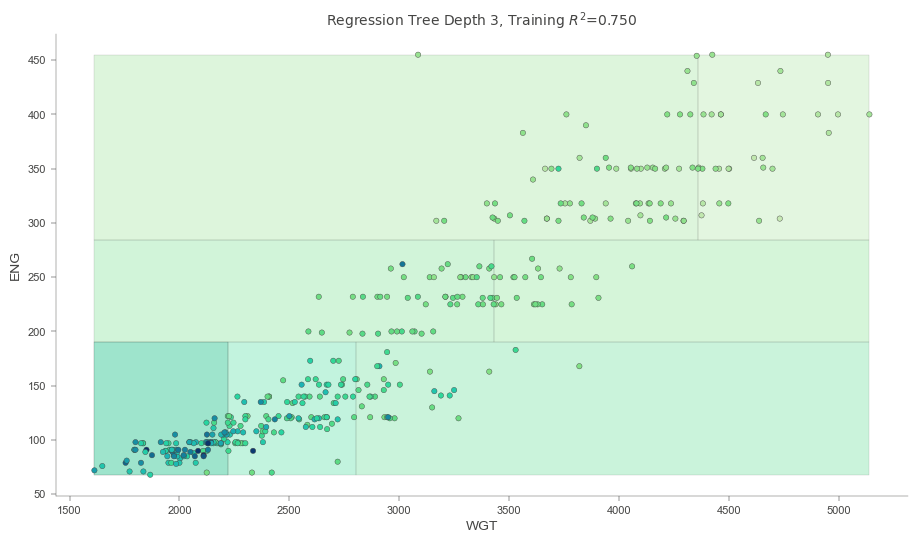

In [79]:
viz_rmodel.rtree_feature_space(features=['WGT','ENG'], figsize=(11,6))